## 6. 모델훈련과 세부튜닝

### 6-1 데이터 불러오기 및 데이터셋 분할

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Fvote.csv')

In [3]:
# 특성치와 레이블 데이터셋 구분
X = data[data.columns[:13]]
y = data[['vote']]

### 6-2 데이터 분할하기

In [7]:
# 종속이 범주형일때 stratify =
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify= y ,random_state=42)

### 6-3. Grid Search

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [10]:
# 로지스틱 알고리즘 적용
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()

In [12]:
# 그리드 서치를 모델에 적용
# 교차검증 5 설정, 훈련데이터 정확도 결과 제시하기(True)
grid_search = GridSearchCV(logi, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [19]:
# 정확도가 가장 높은 하이퍼 파라미터 및 정확도 제시
print(f'Best Parameter: {grid_search.best_params_}')
print(f'Best Cross_validity Score: {round(grid_search.best_score_,3)}')

Best Parameter: {'C': 10}
Best Cross_validity Score: 0.727


In [21]:
# 테스트 데이터에 정확도 결과
print(f'Test set Score: {round(grid_search.score(X_test, y_test),3)}')

Test set Score: 0.679


In [22]:
# 그리드서치 하이퍼파라미터별 상세 결과값
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003965,0.000598,0.001407,0.000475,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.004216,0.000421,0.001178,0.000367,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.003986,0.002090,0.000799,0.000399,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.730159,0.738095,0.738095,0.740157,0.708661,0.731034,0.011698
3,0.009390,0.007667,0.000000,0.000000,1,{'C': 1},0.71875,0.68750,0.81250,0.580645,...,0.721169,0.085441,4,0.738095,0.785714,0.730159,0.763780,0.724409,0.748431,0.022993
4,0.009376,0.007655,0.000000,0.000000,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.007426,0.006173,0.002094,0.003220,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


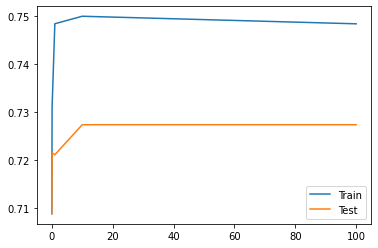

In [31]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label='Test')
plt.legend()